<a href="https://colab.research.google.com/github/Himanshu-Goyal9215/IPL-winner-and-score-predictor/blob/main/IPL_Winner_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing all the packages required
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/matches.csv')

In [4]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
data.shape

(816, 17)

In [6]:
df = data.drop(columns=['id', 'date','player_of_match','neutral_venue','eliminator','method'])

In [7]:
df.head()

,city,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
0,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri
2,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,Aleem Dar,GA Pratapkumar
3,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper
4,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan


In [8]:
df["win_by_runs"]=0
df["win_by_wickets"]=0
df.head()

,city,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,win_by_runs,win_by_wickets
0,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen,0,0
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri,0,0
2,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,Aleem Dar,GA Pratapkumar,0,0
3,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper,0,0
4,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan,0,0


In [9]:
for index, row in df.iterrows():
    if row["result"] == "runs":
        df.at[index, "win_by_runs"] = row["result_margin"]
    elif row["result"] == "wickets":
        df.at[index, "win_by_wickets"] = row["result_margin"]

df.head()

,city,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,win_by_runs,win_by_wickets
0,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen,140,0
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri,33,0
2,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,Aleem Dar,GA Pratapkumar,0,9
3,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper,0,5
4,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan,0,5


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
columns_to_encode = ["venue", "city","team1","team2","toss_winner","toss_decision","winner","umpire1","umpire2"]
mappings = {}
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])
    mappings[col] = dict(enumerate(encoder.classes_))

In [12]:
df.head()

,city,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,win_by_runs,win_by_wickets
0,2,14,13,7,13,1,7,runs,140.0,7,29,140,0
1,7,23,5,0,0,0,0,runs,33.0,26,40,33,0
2,10,8,3,10,10,0,3,wickets,9.0,6,13,0,9
3,23,35,8,13,8,0,13,wickets,5.0,39,12,0,5
4,22,7,7,1,1,0,7,wickets,5.0,8,19,0,5


In [13]:

print("Mappings for all encoded columns:")
print(mappings)

Mappings for all encoded columns:
{'venue': {0: 'Barabati Stadium', 1: 'Brabourne Stadium', 2: 'Buffalo Park', 3: 'De Beers Diamond Oval', 4: 'Dr DY Patil Sports Academy', 5: 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 6: 'Dubai International Cricket Stadium', 7: 'Eden Gardens', 8: 'Feroz Shah Kotla', 9: 'Green Park', 10: 'Himachal Pradesh Cricket Association Stadium', 11: 'Holkar Cricket Stadium', 12: 'JSCA International Stadium Complex', 13: 'Kingsmead', 14: 'M Chinnaswamy Stadium', 15: 'M.Chinnaswamy Stadium', 16: 'MA Chidambaram Stadium, Chepauk', 17: 'Maharashtra Cricket Association Stadium', 18: 'Nehru Stadium', 19: 'New Wanderers Stadium', 20: 'Newlands', 21: 'OUTsurance Oval', 22: 'Punjab Cricket Association IS Bindra Stadium, Mohali', 23: 'Punjab Cricket Association Stadium, Mohali', 24: 'Rajiv Gandhi International Stadium, Uppal', 25: 'Sardar Patel Stadium, Motera', 26: 'Saurashtra Cricket Association Stadium', 27: 'Sawai Mansingh Stadium', 28: 'Shaheed Veer Naraya

In [14]:
x = df[['team1', 'team2', 'toss_decision','toss_winner','city', 'venue',  'win_by_runs', 'win_by_wickets', 'umpire1','umpire2']]
y = df[['winner']]

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x)


In [16]:
x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.2, random_state=1)

## 1.KNN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

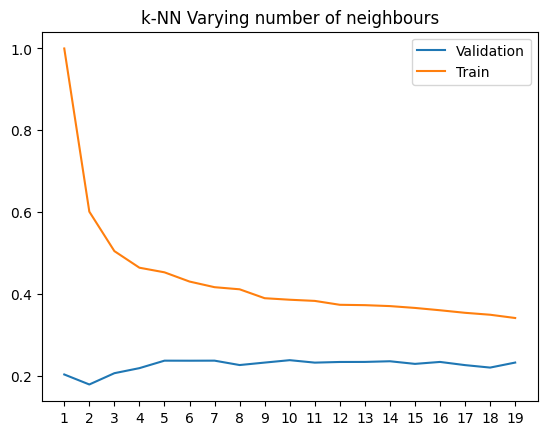

In [17]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store the training and validation scores
train_scores = []
validation_scores = []

# 5-fold cross-validation
kfold = KFold(15, shuffle=True, random_state=42)

# Loop over K values from 1 to 19
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)  # Create KNN model with 'k' neighbors

    # Initialize lists to store fold-wise training and validation scores
    tr_scores = []
    va_scores = []

    # Perform cross-validation
    for train_index, val_index in kfold.split(x_model):
        x_train_fold, x_val_fold = x_model.iloc[train_index], x_model.iloc[val_index]
        y_train_fold, y_val_fold = y_model.iloc[train_index], y_model.iloc[val_index]

        knn.fit(x_train_fold, y_train_fold)  # Train the model
        tr_scores.append(knn.score(x_train_fold, y_train_fold))  # Training accuracy
        va_scores.append(knn.score(x_val_fold, y_val_fold))  # Validation accuracy

    # Store the mean training and validation scores for this K
    train_scores.append(np.mean(tr_scores))
    validation_scores.append(np.mean(va_scores))

# Plot the results
plt.title('k-NN Varying number of neighbours')
plt.plot(range(1, 20), validation_scores, label="Validation")
plt.plot(range(1, 20), train_scores, label="Train")
plt.legend()
plt.xticks(range(1, 20))
plt.show()


### CURSE OF HIGH DIMENSIONALITY

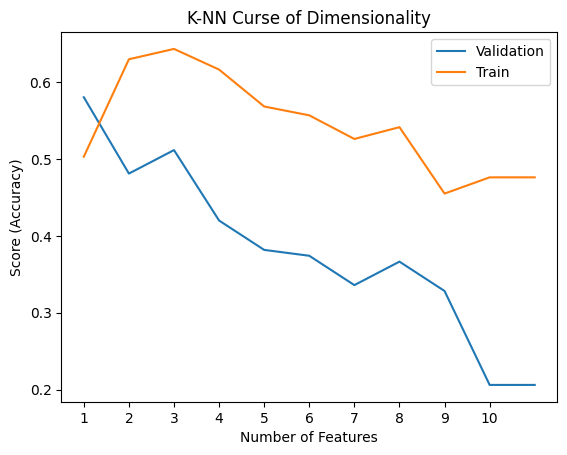

In [18]:
d_train, d_val = [], []

# Loop over the number of features (1 to 11)
for i in range(1, 12):
    x_train_subset = x_train.iloc[:, :i]  # Select first i features for training
    x_val_subset = x_val.iloc[:, :i]      # Select first i features for validation

    # Fit the KNN model and calculate scores
    knn = KNeighborsClassifier(5)
    knn.fit(x_train_subset, y_train.values.ravel())  # Train the model

    # Append the training and validation scores
    d_train.append(knn.score(x_train_subset, y_train))
    d_val.append(knn.score(x_val_subset, y_val))

# Plot the learning curve for the curse of dimensionality
plt.title('K-NN Curse of Dimensionality')
plt.plot(range(1, 12), d_val, label="Validation")
plt.plot(range(1, 12), d_train, label="Train")
plt.xlabel('Number of Features')
plt.ylabel('Score (Accuracy)')
plt.legend()
plt.xticks(range(1, 11))  # Ensure all ticks are displayed
plt.show()

In [26]:
# The best result is captured at k = 5; hence it is used for the final model.

#Setup a knn classifier with k neighbors

kfold = KFold(15, shuffle=True, random_state=42)
knn = KNeighborsClassifier(1)

for m,n in kfold.split(x_model):

        x_train_fold, y_train_fold = x_model.iloc[m], y_model.iloc[m]

        Knn = knn.fit(x_train_fold, y_train_fold)

print('When k=5, the testing score(accuracy) is: ')
print(Knn.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

When k=5, the testing score(accuracy) is: 
0.31097560975609756


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# DECISION TREE CLASSIFIER

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
print(decision_tree_model.score(x_train,y_train))
print(decision_tree_model.score(x_val,y_val))

1.0
0.3816793893129771


In [29]:
x_train.columns.values

array(['team1', 'team2', 'toss_decision', 'toss_winner', 'city', 'venue',
       'win_by_runs', 'win_by_wickets', 'umpire1', 'umpire2'],
      dtype=object)

([<matplotlib.axis.XTick at 0x7f50eca41660>,
 [Text(0, 0, 'team1'),
  Text(1, 0, 'team2'),
  Text(2, 0, 'toss_decision'),
  Text(3, 0, 'toss_winner'),
  Text(4, 0, 'city'),
  Text(5, 0, 'venue'),
  Text(6, 0, 'win_by_runs'),
  Text(7, 0, 'win_by_wickets'),
  Text(8, 0, 'umpire1'),
  Text(9, 0, 'umpire2')])

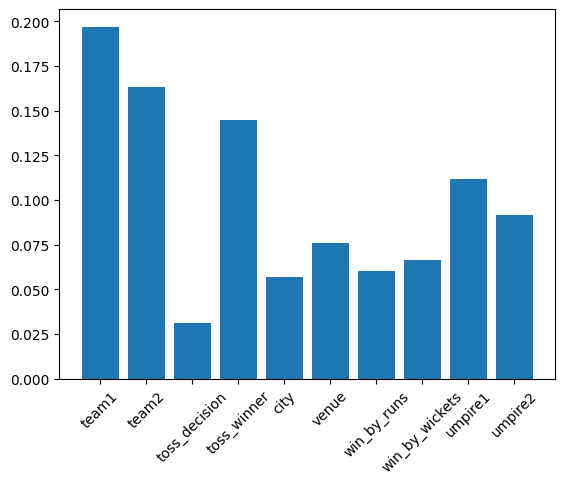

In [21]:
plt.bar(range(len(x_train.columns.values)), decision_tree_model.feature_importances_)
plt.xticks(range(len(x_train.columns.values)),x_train.columns.values, rotation= 45)



Text(0, 0.5, 'Accuracy')

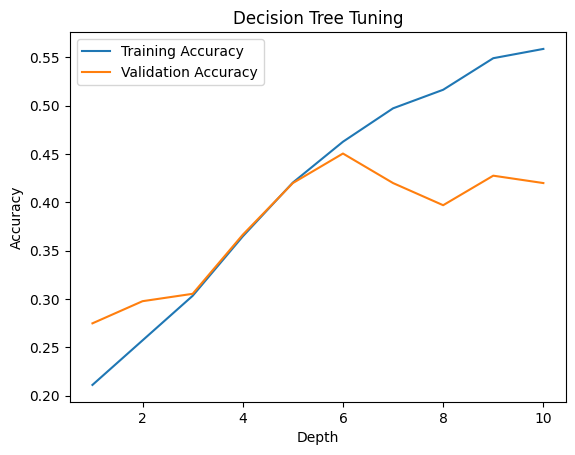

In [42]:
train_score = []
val_score = []
for depth in range(1,11):
    decision_tree = tree.DecisionTreeClassifier(criterion='gini',max_depth = depth,min_samples_leaf = 10)
    decision_tree.fit(x_train, y_train)
    train_score.append(decision_tree.score(x_train, y_train))
    val_score.append(decision_tree.score(x_val, y_val))

plt.plot(np.arange(1,11),train_score)
plt.plot(np.arange(1,11),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Decision Tree Tuning')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

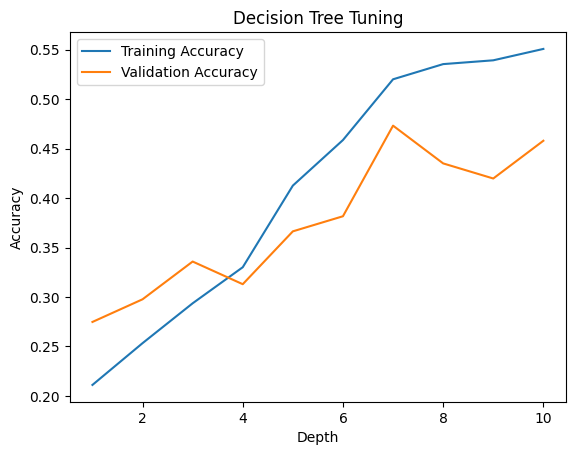

In [43]:
train_score = []
val_score = []
for depth in range(1,11):
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth = depth,min_samples_leaf = 10)
    decision_tree.fit(x_train, y_train)
    train_score.append(decision_tree.score(x_train, y_train))
    val_score.append(decision_tree.score(x_val, y_val))

plt.plot(np.arange(1,11),train_score)
plt.plot(np.arange(1,11),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Decision Tree Tuning')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

So when we increase features after certain limit then the accuracy starts to decrease

Text(0, 0.5, 'Accuracy')

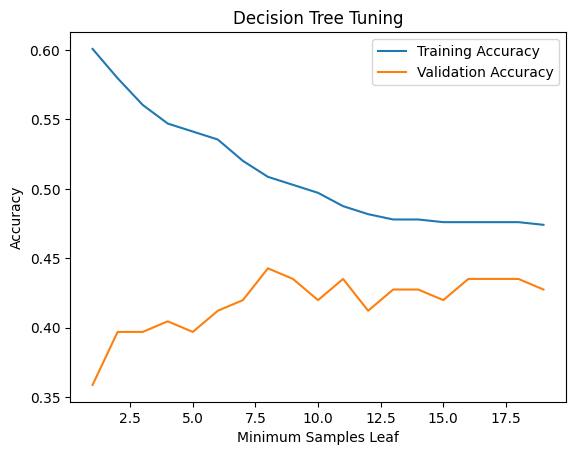

In [44]:
train_score = []
val_score = []
for leaf in np.arange(1,20):
    decision_tree = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = leaf)
    decision_tree.fit(x_train, y_train)
    train_score.append(decision_tree.score(x_train, y_train))
    val_score.append(decision_tree.score(x_val, y_val))

plt.plot(np.arange(1,20),train_score)
plt.plot(np.arange(1,20),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Decision Tree Tuning')
plt.xlabel('Minimum Samples Leaf')
plt.ylabel('Accuracy')

In [59]:
my_decision_tree_model = DecisionTreeClassifier(criterion='entropy',max_depth = 10, min_samples_leaf = 8)
my_decision_tree_model.fit(x_train, y_train)
print(my_decision_tree_model.score(x_train,y_train))
print(my_decision_tree_model.score(x_val,y_val))


0.5969289827255279
0.42748091603053434


In [60]:
print(my_decision_tree_model.score(x_test,y_test))

0.4146341463414634


###Curse of Dimensionality



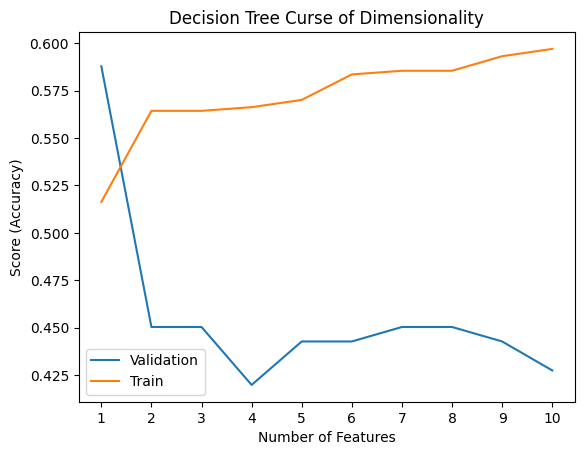

In [61]:
d_train = []
d_val = []

for i in range(1,11):

    x_train_index = x_train.iloc[: , 0:i]
    x_val_index = x_val.iloc[: , 0:i]

    classifier = DecisionTreeClassifier(criterion='entropy',max_depth = 10, min_samples_leaf = 8)
    dt_model = classifier.fit(x_train_index, y_train.values.ravel())

    d_train.append(dt_model.score(x_train_index, y_train))
    d_val.append(dt_model.score(x_val_index, y_val))
plt.title('Decision Tree Curse of Dimensionality')
plt.plot(range(1,11),d_val,label="Validation")
plt.plot(range(1,11),d_train,label="Train")
plt.xlabel('Number of Features')
plt.ylabel('Score (Accuracy)')
plt.legend()
plt.xticks(range(1,11))
plt.show()

#NEURAL NETWORK

In [75]:
from sklearn.neural_network import MLPClassifier

# Define a model with hyperparameters
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,50),  # Two hidden layers with 100 and 50 neurons
    activation='logistic',         # logistiic activation function
    solver='adam',                 # Adam optimizer
    learning_rate='adaptive',      # Adaptive learning rate
    learning_rate_init=0.001,      # Initial learning rate
    max_iter=1000,                 # Max iterations for convergence
    alpha=0.0001,                  # Regularization term
    batch_size=64,                 # Batch size
    early_stopping=True,           # Use early stopping
    validation_fraction=0.1,       # Fraction of data for validation
    n_iter_no_change=10,           # Stop if no improvement after 10 iterations
    random_state=42                 # Reproducibility
)

# Train the model
mlp_model.fit(x_train, y_train)

# Evaluate the model on the training and validation sets
print("Training Accuracy:", mlp_model.score(x_train, y_train))
print("Validation Accuracy:", mlp_model.score(x_val, y_val))



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.31669865642994244
Validation Accuracy: 0.3435114503816794


# NAIVE BAYES


In [89]:
# NB assumes that the features themselves are not correlated to each other. Therefore, if the collinearity of our features is low, the model will perform better.
from sklearn.naive_bayes import GaussianNB,CategoricalNB ,MultinomialNB, BernoulliNB,ComplementNB

gaussian = GaussianNB(priors=None, var_smoothing=0.03)
nb_model = gaussian.fit(x_train, y_train.values.ravel())

print(nb_model.score(x_train,y_train))
print(nb_model.score(x_test, y_test))

0.32629558541266795
0.25


# SVM

In [93]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

classifier = SVC(gamma = 'auto')
svm_model = OneVsRestClassifier(classifier, n_jobs=1).fit(x_train, y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_val,y_val))

1.0
0.22137404580152673


In [106]:
classifier = SVC(C=9, # Regularization parameter
        kernel='rbf', # kernel type, rbf working fine here
        gamma=0.005, # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. It defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
        shrinking=True, # using shrinking heuristics
        tol=0.1, # stopping criterion tolerance
        class_weight=None, # all classes are treated equally
        verbose=False, # print the logs
        random_state=None)
svm_model = OneVsRestClassifier(classifier).fit(x_train, y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_val,y_val))

0.9942418426103646
0.22137404580152673
